<h4>HW 2 Solutions<br>CSCI 4965 / 6965 <br>Fall Semester 2023<hr>
S M Rayeed<br>RIN : 662066963<br>Email : rayees@rpi.edu</h4>

<hr><h6>Solution 01</h6>

    In the given function,
    1. The height and width of the 1st image (fn0) have been stored in h0, w0. And, height and width of the 2nd image (fn1) have been stored in h1, w1.
    2. Then I have taken the minumum height using np.min() and adjusted the width and height of the other image accordingly by resizing the image using cv2.resize() function. 
    3. After that, by using np.concatenate(), the two images (with same height) have been concatenated.
    4. Then as asked in the question, the height and width of the concatenated image have been printed and the concatenated image has been displayed.

Resulting height 233, width 898


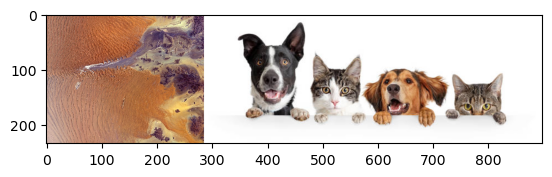

Resulting height 440, width 1152


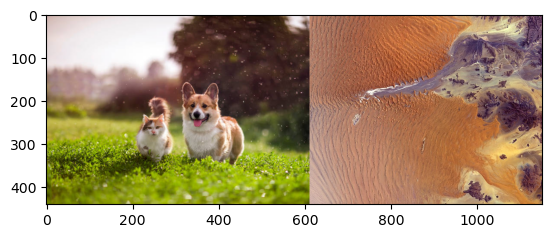

Resulting height 440, width 1272


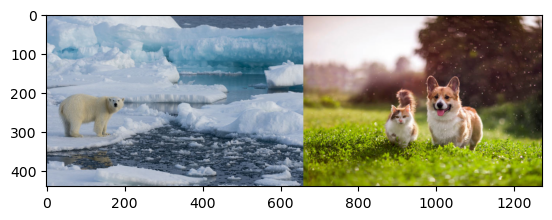

Resulting height 800, width 2401


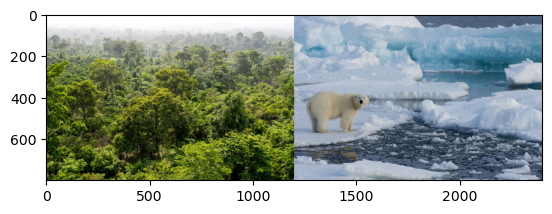

Resulting height 233, width 961


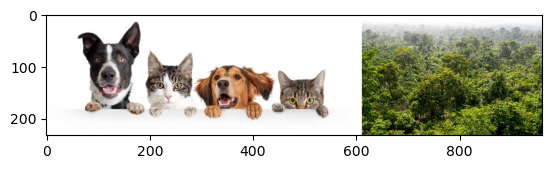

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def prob1_concatenate(fn0, fn1):

    im0 = cv2.imread(fn0)
    im1 = cv2.imread(fn1)

    h0, w0 = im0.shape[:2]                        # extracting the height and width of Image 0
    h1, w1 = im1.shape[:2]                        # extracting the height and width of Image 1

    new_h = min(h0,h1)                            # Taking the minimum height as height for concatenated image
    new_w0 = (int(w0 * new_h / h0))               # adjusting width of Image 0 according to new height
    new_w1 = (int(w1 * new_h / h1))               # adjusting width of Image 1 according to new height
   
    new_im0 = cv2.resize(im0, (new_w0, new_h))    # Resized Image 0 - with new width and height
    new_im1 = cv2.resize(im1, (new_w1, new_h))    # Resized Image 1 - with new width and height

    im_res = np.concatenate((new_im0, new_im1), axis=1)

    return im_res

im0_fns = [
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
    'two_and_two.jpeg',
]

im1_fns = [
    'two_and_two.jpeg',
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
]


for fn0, fn1 in zip(im0_fns, im1_fns):
    im_res = prob1_concatenate(fn0, fn1)
    print(f'Resulting height {im_res.shape[:2][0]}, width {im_res.shape[:2][1]}')
    plt.imshow(cv2.cvtColor(im_res, cv2.COLOR_BGR2RGB))
    plt.show()

<hr><h6>Solution 02</h6>

    In the given function
    1. 3 color channels (red, green, blue) of the image have been stored into 3 separate arrays: red, green, blue.
    2. Then the mean values of the pixel intensities for each color channel (red, green, and blue) are calculated using NumPy's mean function. The results are stored in the variables : mean_red, mean_green, mean_blue.
    3. Similarly the standard deviation of the pixel intensities for each color channel are calculated using NumPy's std function. The results are stored in the variables : std_red, std_green, std_blue.
    4. Finally the mean and standard deviation of the color channels (with one decimal place of precision) are printed sequentially (in this order : Red, Green, Blue).

In [2]:
'''
Question 2
'''
import numpy as np
import cv2
from matplotlib import pyplot as plt

#### Solution start

def prob2_color(fn):
    
    im = cv2.imread(fn)
    red, green, blue = im[:,:,0], im[:,:,1], im[:,:,2]

    # mean
    mean_red, mean_green, mean_blue = np.mean(red), np.mean(green), np.mean(blue)
    
    # standard deviation
    std_red, std_green, std_blue = np.std(red), np.std(green), np.std(blue)
    
    # output with one decimal place of precision
    print(f'red: {mean_red:.1f} {std_red:.1f}')
    print(f'green: {mean_green:.1f} {std_green:.1f}')
    print(f'blue: {mean_blue:.1f} {std_blue:.1f}')

#### Solution end


im_fns = [
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
    'two_and_two.jpeg',
]

for fn in im_fns:
    prob2_color(fn)
    print()

red: 92.0 33.6
green: 118.1 36.9
blue: 168.4 37.7

red: 79.3 79.1
green: 127.6 69.8
blue: 136.3 64.6

red: 166.4 44.8
green: 148.7 44.8
blue: 130.0 49.6

red: 81.1 82.1
green: 123.3 71.1
blue: 114.3 74.3

red: 210.7 75.8
green: 214.4 70.6
blue: 220.4 62.9



<hr><h6>Solution 03</h6>

    In the given function
    1. While row-wise sequentially reading the values, the queries with -1 values were discarded.
    2. From the 'valid' values, Sum of these values for each row and also, Sum of values across all rows were calculated.
    3. Using the row-wise sum, then I calculated row-wise average.
    4. For macro average, I used the row-wise average and took the mean of it using np.mean(). And for micro average, I used the sum of values across all rows.
    5. Finally the values are printed sequentially (in this order : 0, 1, Macro, Micro).

In [3]:
'''
Question 3
'''
import numpy as np

#### Solution start

def prob3_macro_micro(arr):
    print(arr)
    
    row_values_sum, row_values_count = [], []
    all_values_sum, all_values_count = 0, 0
    rows = arr.shape[0] # number of rows

    # Iterate through each row (i.e. category) in the input array
    for i in range(rows):
        row_values_all = arr[i,:]  # get all values for the current row (i.e category)
        # print(row_values_all)
        row_values_valid = row_values_all[row_values_all != -1]  # discard the -1 values from the row (i.e category)
        # print(row_values_valid)
        row_values_sum.append(np.sum(row_values_valid))  # Sum of valid values for each row (i.e. category)
        row_values_count.append(len(row_values_valid))   # Count number of valid values for each row (i.e. category)
        all_values_sum += np.sum(row_values_valid)       # Sum of all valid values across all rows (for micro average)
        all_values_count += len(row_values_valid)        # Count number of valid values in total (for micro average)
        
    # Calculate category-wise averages    
    category_wise_average = [total/count if count > 0 else 0 for total, count in zip(row_values_sum, row_values_count)]
        
    # Calculate the macro average (average of category-wise averages)
    macro_average = np.mean(category_wise_average)
    # macro_average = np.sum(category_wise_average)/len(category_wise_average)   -> this also works!
    
    # Calculate the micro average (overall average across all valid queries)
    micro_average = all_values_sum/all_values_count

    # Print category-wise averages, macro average, and micro average
    for i, average in enumerate(category_wise_average): print(f'{i}: {average:.2f}')
    print(f'Macro: {macro_average:.2f}')
    print(f'Micro: {micro_average:.2f}')

    
#### Solution end

fns = [
    'q3_ex1.txt',
    'q3_ex2.txt'
]

for fn in fns:
    print(f'\n{fn}')
    arr = np.loadtxt(fn, delimiter=",", dtype=int)
    prob3_macro_micro(arr)


q3_ex1.txt
[[ 2 -1  5  1  4  4]
 [ 4  8 -1 -1 -1 11]]
0: 3.20
1: 7.67
Macro: 5.43
Micro: 4.88

q3_ex2.txt
[[12 -1  5  1 10 16  8  7  8 -1 -1 -1]
 [ 4  8  6 -1 -1  5  1  1  1  2  6 -1]
 [ 8  7 -1 -1 13 -1 15 -1 -1 -1 -1  3]
 [-1  6  3  5  1  1  1  4  3  4  1  2]]
0: 8.38
1: 3.78
2: 9.20
3: 2.82
Macro: 6.04
Micro: 5.39


NB. I have got a different output (from the one in question) for Solution 03 : 
 - Row 1 : [2 -1  5  1  4  4] >> Discarding -1s : [2 5 1 4 4] >> Sum : 16 ; Average : 3.2
 - Row 2 : [4  8 -1 -1 -1 11] >> Discarding -1s : [4 8 11] >> Sum : 23 ; Average : 7.67
 - Macro : Average of Row-wise average = (3.20+7.67)/2 = 5.43
 - Micro : Average of All the values (other than -1s) = 39/8 = 4.88

<h5>Why might we be interested in both the macro and micro averages?</h5><hr>
Macro average helps us identify category-specific performance issues, while the micro average provides a comprehensive view of the system's overall effectiveness across all queries, allowing us to make targeted improvements and ensure a satisfactory user experience.

<hr><h6>Solution 04</h6>
    
    In the given function,
    1. After the images being loaded, the quartiles' points are deined in quartiles array. (As we know, 0% to 25% belongs to Quartile 1; 25% to 50% belongs to Quartile 2; 50% to 75% belongs to Quartile 3; 75% to 100% belongs to Quartile 4)
    2. Then I calculated quartile breaks, using np.min function that takes the minimum values from an array (since the quartile breaks are the smallest intensities mapped to the second, third and fourth quartile).
    3. After that, I assigned the values to the pixels based on which quartile each pixel belongs to (for Q1, value 0; for Q2, Value : 85; for Q3, value : 170, and for Q4, value : 255)
    4. Finally I printed the quartile breaks and displayed the final image.


Namib_Desert_(Satellite_picture).jpg
Quartile breaks: 113, 132, 153


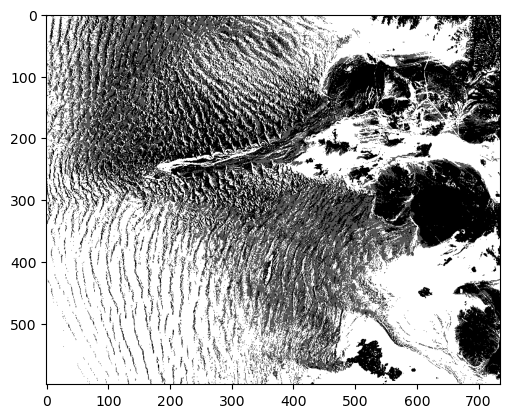


cat-dog-1.jpeg
Quartile breaks: 59, 127, 168


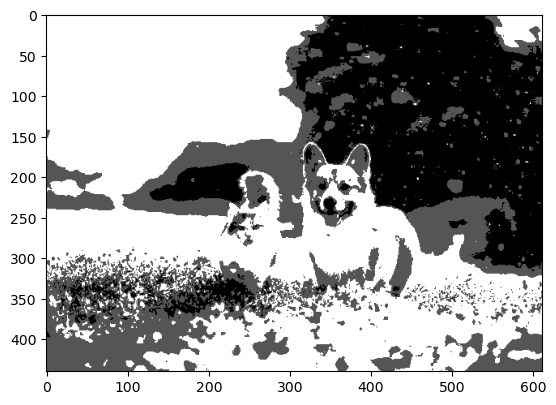


polar-bear-ice.jpg
Quartile breaks: 108, 162, 182


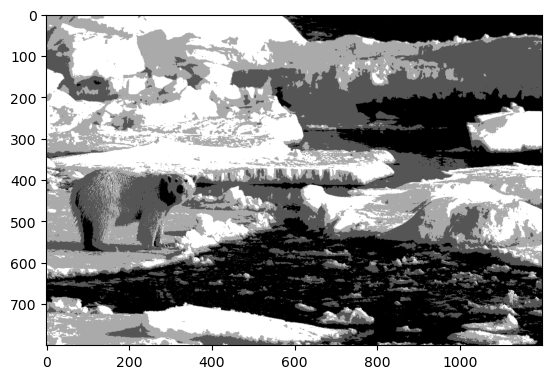


Ghanean-Rainforest-scaled.jpg
Quartile breaks: 57, 106, 168


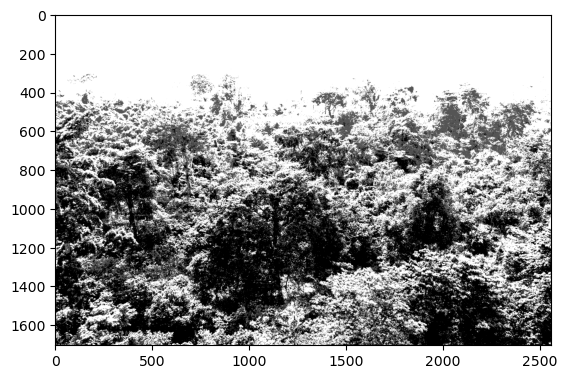


two_and_two.jpeg
Quartile breaks: 204, 255, 255


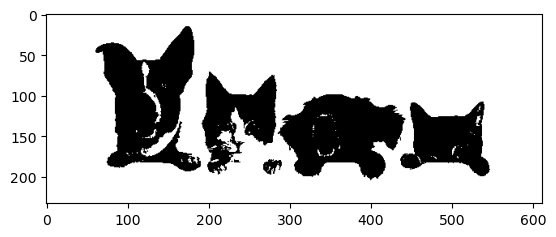

In [4]:
'''
Question 4:

Alert: in order to properly show a grayscale image using Matplotlib
you must call plt.gray() before you call plt.imshow and plt.show
'''
import numpy as np
import cv2
from matplotlib import pyplot as plt

#### Solution start

def prob4_multithreshold(fn):

    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    quartiles = np.percentile(img, [25, 50, 75])    

    # Calculate the breaks between quartiles
    img_1st_to_2nd = img[(img > quartiles[0]) & (img <= quartiles[1])]
    img_2nd_to_3rd = img[(img > quartiles[1]) & (img <= quartiles[2])]
    img_3rd_to_4th = img[img > quartiles[2]]
    
    breaks = [
        np.min(img_1st_to_2nd) if img_1st_to_2nd.size > 0 else quartiles[1], #smallest intensity to 2nd quartile
        np.min(img_2nd_to_3rd) if img_2nd_to_3rd.size > 0 else quartiles[2], #smallest intensity to 3rd quartile
        np.min(img_3rd_to_4th) if img_3rd_to_4th.size > 0 else 255 #smallest intensity to 4th quartile
    ]
    
    # Assign values based on quartiles
    img[img <= quartiles[0]] = 0
    img[(img > quartiles[0]) & (img <= quartiles[1])] = 85
    img[(img > quartiles[1]) & (img <= quartiles[2])] = 170
    img[img > quartiles[2]] = 255
    
    # Output the quartile breaks
    print(f"Quartile breaks: {int(breaks[0])}, {int(breaks[1])}, {int(breaks[2])}")
    
    # Output the Final Image
    plt.gray()
    plt.imshow(img)
    plt.show()


#### Solution end

im_fns = [
    'Namib_Desert_(Satellite_picture).jpg',
    'cat-dog-1.jpeg',
    'polar-bear-ice.jpg',
    'Ghanean-Rainforest-scaled.jpg',
    'two_and_two.jpeg'
]

for fn in im_fns:
    print(f'\n{fn}')
    prob4_multithreshold(fn)